In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Transfer Table Definitions into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Initial Investigation of Precipitation Patterns

In [9]:
# Find and print the most recent date in the data set
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {most_recent_date[0]}")


The most recent date in the data set is: 2017-08-23


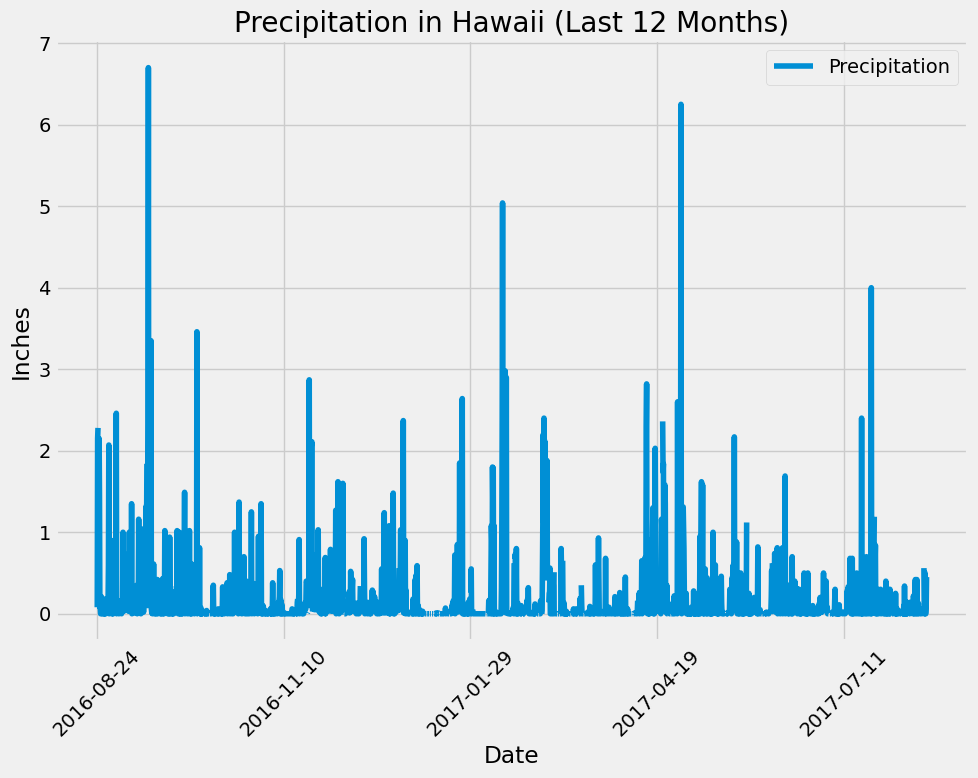

In [10]:
# Calculate the date one year ago from the most recent date in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query to retrieve the date and precipitation data for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

# Create a DataFrame from the query results
precipitation_df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])

# Set the Date column as the DataFrame index
precipitation_df.set_index("Date", inplace=True)

# Plot the precipitation data
plt.figure(figsize=(10, 8))
precipitation_df.plot(ax=plt.gca())  # You can directly plot using the DataFrame
plt.title("Precipitation in Hawaii (Last 12 Months)")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=45)
plt.legend(["Precipitation"], loc="upper right")
plt.tight_layout()
plt.show()


In [11]:
# Generate summary statistics for the 'Precipitation' column
precipitation_summary = precipitation_df["Precipitation"].describe()

# Print the summary statistics
print(precipitation_summary)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.id)).scalar()

# Print the total number of stations
print("Total number of stations:", total_stations)


Total number of stations: 9


In [13]:
# Query to calculate the total number of observations (tobs) for each station, ordered by most active stations
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

# Print the station activity results
for station, count in station_activity:
    print(f"Station {station} had {count} total observations (tobs).")


Station USC00519281 had 2772 total observations (tobs).
Station USC00519397 had 2724 total observations (tobs).
Station USC00513117 had 2709 total observations (tobs).
Station USC00519523 had 2669 total observations (tobs).
Station USC00516128 had 2612 total observations (tobs).
Station USC00514830 had 2202 total observations (tobs).
Station USC00511918 had 1979 total observations (tobs).
Station USC00517948 had 1372 total observations (tobs).
Station USC00518838 had 511 total observations (tobs).


In [14]:
# Query to calculate the minimum, maximum, and average temperature for station USC00519281
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

# Print the temperature statistics
for min_temp, max_temp, avg_temp in temperature_stats:
    print(f"Station USC00519281 Temperature Statistics:")
    print(f"Minimum Temperature: {min_temp} °F")
    print(f"Maximum Temperature: {max_temp} °F")
    print(f"Average Temperature: {avg_temp} °F")


Station USC00519281 Temperature Statistics:
Minimum Temperature: 54.0 °F
Maximum Temperature: 85.0 °F
Average Temperature: 71.66378066378067 °F


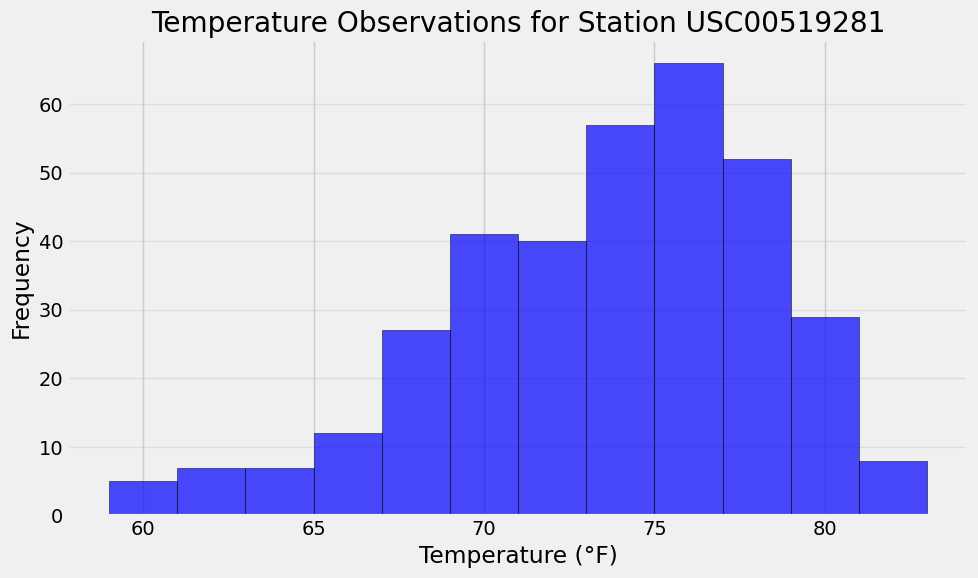

In [15]:
# Query to retrieve temperature observations for station USC00519281 in the last 12 months
temp_observations = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > year_ago).all()

# Create a DataFrame from the query results
temperature_df = pd.DataFrame(temp_observations, columns=["Date", "Temperature (°F)"])

# Plot a histogram of the temperature observations
plt.figure(figsize=(10, 6))
plt.hist(temperature_df["Temperature (°F)"], bins=12, alpha=0.7, color='b', edgecolor='black')
plt.title('Temperature Observations for Station USC00519281')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()